In [1]:
!git clone https://github.com/Atharva-Malode/ML-Bootcamp.git

Cloning into 'ML-Bootcamp'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 425 (delta 100), reused 152 (delta 65), pack-reused 193
Receiving objects: 100% (425/425), 8.68 MiB | 13.23 MiB/s, done.
Resolving deltas: 100% (141/141), done.


In [2]:
!pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df = pd.read_csv("/content/ML-Bootcamp/Week-3/Day-1/Dataset/SMSSpamCollection.txt", sep="\t", names = ['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.shape

(5572, 2)

Data Cleaning

In [7]:
import re
import nltk       #natural language toolkit
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
sn = SnowballStemmer("english")
stop = set(stopwords.words("english"))

In [22]:
def clean_text(sms):
  sms = sms.lower()      #lowercase all letters
  sms = re.sub("[^a-z]",' ',sms)  # except the a-z replace everytihig with space
  sms = nltk.word_tokenize(sms) #to tokenize
  sms = [t for t in sms if len(t)>1]   #to have no impact of single letters in the sentence
  sms = [sn.stem(word) for word in sms if word not in stop]
  sms = ' '.join(sms)

  return sms


In [23]:
clean_text("Hello, Get this stuff for free playing ???????+++ just Rs. 10. b b")

'hello get stuff free play rs'

In [24]:
df['text'].apply(clean_text)

0       go jurong point crazi avail bugi great world l...
1                                     ok lar joke wif oni
2       free entri wkli comp win fa cup final tkts st ...
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact pound prize claim easi cal...
5568                                  go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object

In [25]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Wordcloud

In [36]:
ham_data = df[df['label']== 'ham']
ham_data = ham_data['text']
spam_data = df[df['label']=='spam']
spam_data = spam_data['text']

In [34]:
def wordCloud(data):
  words = ' '.join(data)
  wc = WordCloud(background_color = 'white')
  wc = wc.generate(words)

  plt.figure(figsize = (10,8))
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

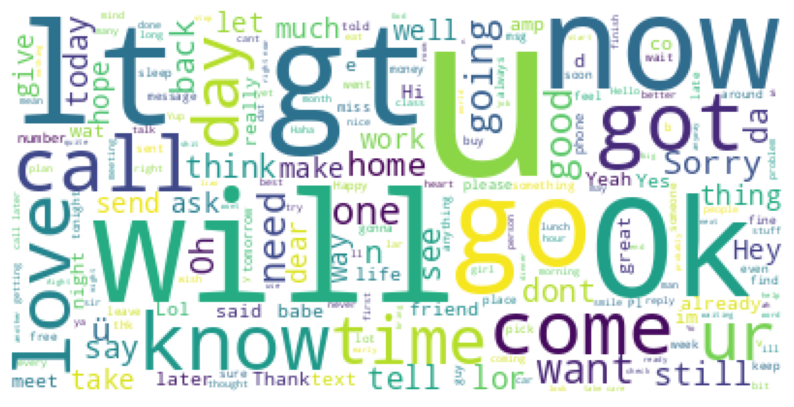

In [35]:
wordCloud(ham_data)

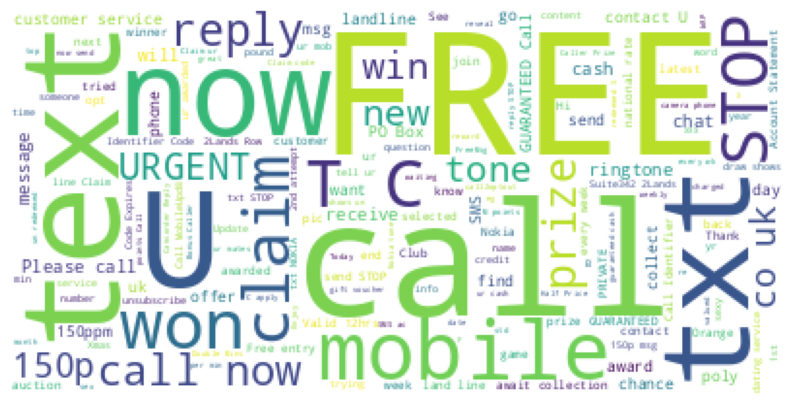

In [37]:
wordCloud(spam_data)

Featurization

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
cv = CountVectorizer(max_features = 5000)

In [48]:
X = cv.fit_transform(df['text']).toarray()

In [49]:
X.shape

(5572, 5000)

In [53]:
y = pd.get_dummies(df['label'])
y = y['spam'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

Model Building

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [55]:
model = MultinomialNB()

In [56]:
model.fit(X_train,y_train)

MultinomialNB()

In [57]:
y_pred = model.predict(X_test)

In [59]:
y_test,y_pred

(array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8))

In [60]:
pd.DataFrame({'Actual' : y_test,'Predicted': y_pred}).head(10)

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


Evaluation

In [61]:
print("Accuracy on Training Data:")
print(model.score(X_train,y_train))

Accuracy on Training Data:
0.990624162871685


In [62]:
print("Accuracy on test Data:")
print(model.score(X_test,y_test))

Accuracy on test Data:
0.9864056552474171
